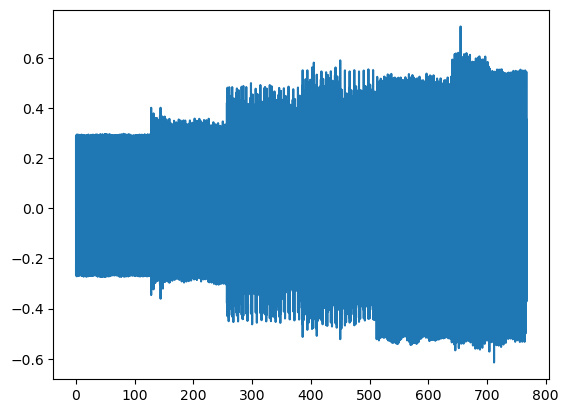

In [ ]:
import numpy as np
from scipy.io.wavfile import write
import matplotlib.pyplot as plt
import sounddevice

samplerate = 44100  # Default sample rate (44.1kHz)
duration = 192     

# This was the first ever piece of music I made exclusively with math

t = np.linspace(0,duration*4, round(samplerate*duration))

stepup_slowest = np.floor(np.mod(t*1/512,2))
stepup_slow = np.floor(np.mod(t*1/256,2))
stepup = np.floor(np.mod(t*1/128,2))
stepup_often = np.floor(np.mod(t*1/32,2))
stepup_oft = np.floor(np.mod(t*1/64,2))
beep = np.floor(np.mod(t*1/8,2))

kick = np.sin(np.pi*2*np.mod(t,4/(stepup_slowest+1))*(8**(-np.mod(t,2/(stepup_slowest+1)))*3+np.mod(t,2/(stepup_slowest+1))+1)*(5-stepup_often))*(8**(-np.mod(t,2/(stepup_slowest+1)))*3)*1/3
kick = -1/(1+3**(-kick*12*(1+np.mod(-t,3/(stepup_slowest+1)))))*2+1
hat = np.mod(-t,1)**(16-stepup*4)*np.sin(t*(np.abs(stepup_slow-1))*100*np.pi*2+np.sin(t*(7000-stepup_oft*4000))*np.sin(np.mod(t,8)))
hat1 = sum([(np.mod(-t+i/2.2,1)**(16-stepup*4)*np.sin((t+i/2.2)*100*np.pi*2+np.sin((t+i/2.2)*7000)*np.sin(np.mod((t+i/2.2),8))))*0.4/i for i in range(1,4)])
tone = np.sin(np.pi*2*5*np.mod(t,4)**2*1)*0.5+np.sin(np.pi*2*(20-stepup_often*7.5)*np.mod(t,8)*2)*np.sin(np.pi*2*(20+stepup_oft*2.5)*np.mod(t,16)*3)*np.sin(np.pi*2*20*np.mod(t,2)*4)

harmNoise = sum([np.sin(t*i*np.pi*2*50+i*np.pi*2*(np.mod(t+1/i,1)+1)*50)*np.mod(t+i/(np.pi*(abs(+np.sin(t*0.2)+np.sin(t*np.pi*0.04))+0.1)),1)**16 for i in range(3,9)])
noise = (np.sin(t*440+np.cos(t*np.pi*700+np.sin(t*562*np.sin(t*4076))))+np.sin(t*np.pi*2*200)*beep*0.5)*np.abs(np.sin(t*np.pi*0.008)*np.sin(t*0.002))

audio = noise*0.05+harmNoise*0.15*np.sin(t*0.06)*np.floor(np.mod(-t*1/32,2))*stepup+kick*0.5*np.floor(np.mod((t+256)*1/512,2))+hat*0.6+tone*0.15*stepup+hat1*0.1*stepup_often

audio *= 0.5

audio_int16 = np.int16(audio * 32767)
write("EquationBeat1.wav", samplerate, audio_int16)

# comment this out to hear the music after execution
#sounddevice.play(audio,samplerate)

plt.plot(t,audio)
plt.show()

